In [1]:
import requests
from PIL import Image
import io

In [2]:
BITMIND_URL = "https://api.bitmind.ai/oracle/v1/34/detect-image"
BITMIND_KEY = "oracle-dc220854-d6f1-4282-92d6-55d4f9fac521:64b25953"


In [3]:
def call_bitmind_api(image_path):
    """
    Sends an image to BitMind API and returns the confidence score and raw response.
    """
    with open(image_path, "rb") as f:
        image_bytes = f.read()

    headers = {"Authorization": f"Bearer {BITMIND_KEY}"}
    files = {"image": ("image.jpg", image_bytes, "image/jpeg")}

    resp = requests.post(BITMIND_URL, headers=headers, files=files)

    # Check for HTTP errors
    try:
        resp.raise_for_status()
    except requests.exceptions.HTTPError as e:
        print(f"HTTP Error: {e}")
        print("API Response Content:", resp.text)
        raise

    data = resp.json()
    # Extract confidence score (use 0.5 as fallback if missing)
    score = float(data.get("confidence", data.get("score", 0.5)))

    # Determine result
    result = "AI-generated" if score >= 0.5 else "Real"

    return {
        "score": round(score, 4),
        "result": result,
        "raw_response": data
    }

In [4]:
if __name__ == "__main__":
    test_image = "ai-generated-picture-of-a-tiger-walking-in-the-forest-photo.jpg"
    result = call_bitmind_api(test_image)
    print(result)

{'score': 1.0, 'result': 'AI-generated', 'raw_response': {'isAI': True, 'predictions': [1], 'confidence': 1, 'similarity': 0, 'fqdn': 'localhost', 'objectKey': '1760216809903.jpeg'}}


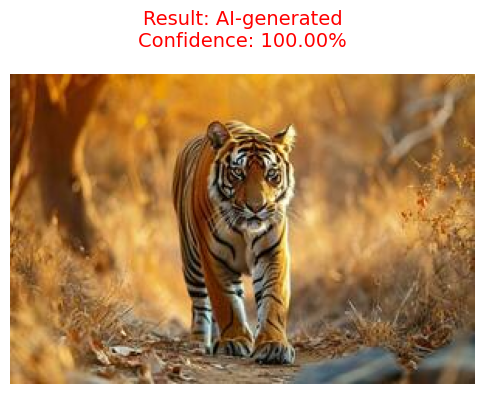

In [5]:
# --- Visualization Cell ---

import matplotlib.pyplot as plt
from PIL import Image

def visualize_result(image_path, result_data):
    """
    Displays the image with the classification result and confidence score.
    """
    # Load image
    image = Image.open(image_path)

    # Plot image
    plt.figure(figsize=(6, 6))
    plt.imshow(image)
    plt.axis("off")

    # Determine color for title text
    color = "green" if result_data["result"] == "Real" or "📸" in result_data["result"] else "red"

    # Add title with result and confidence score
    plt.title(
        f"Result: {result_data['result']}\nConfidence: {result_data['score']*100:.2f}%",
        fontsize=14,
        color=color,
        pad=20
    )
    plt.show()


# --- Run Visualization ---
visualize_result(test_image, result)
